파일 다운 받으시면 배쉬창에서 unzip으로 파일 압축 해제하시고 경로를 data_path에 저장해 주세요

(1080, 1920, 3)


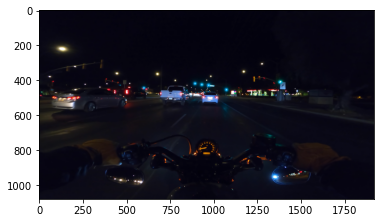

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
data_path = os.path.join(os.getenv('HOME'), 'aiffel/dlthon/moto/data/images')

img=data_path+'/original/night ride (10).png'

test= cv2.imread(img_path) 
print(test.shape)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
import os
import shutil

classifications = ['original', 'fuse', 'save']
for classification in classifications:
    folder_path = os.path.join(data_path, classification)
    os.makedirs(folder_path, exist_ok=True)


file_list = os.listdir(data_path)


for file_name in file_list:
    if file_name.endswith('.png'):
        base_name = os.path.splitext(file_name)[0]
        parts = base_name.split('___')
        
        if len(parts) == 1:
            classification = 'original'
        elif len(parts) == 2:
            classification = parts[1]
        else:
            continue
        
        src_path = os.path.join(data_path, file_name)
        dst_path = os.path.join(data_path, classification, file_name)
        
        shutil.move(src_path, dst_path)
        print(f"Moved {file_name} to {classification} folder")

Moved night ride (18).png___save.png to save folder
Moved night ride (57).png to original folder
Moved Screenshot (378).png___fuse.png to fuse folder
Moved Screenshot (359).png___fuse.png to fuse folder
Moved night ride (36).png___save.png to save folder
Moved night ride (61).png___fuse.png to fuse folder
Moved night ride (62).png to original folder
Moved night ride (85).png to original folder
Moved night ride (77).png to original folder
Moved night ride (15).png___fuse.png to fuse folder
Moved Screenshot (444).png___fuse.png to fuse folder
Moved Screenshot (437).png to original folder
Moved Screenshot (395).png to original folder
Moved Screenshot (435).png to original folder
Moved night ride (21).png___save.png to save folder
Moved night ride (12).png___save.png to save folder
Moved Screenshot (420).png to original folder
Moved Screenshot (449).png to original folder
Moved Screenshot (445).png___save.png to save folder
Moved night ride (8).png to original folder
Moved night ride (76).

In [66]:
import numpy as np
from PIL import Image

# 전처리 매개변수
image_size = (256, 256)  # 이미지 크기를 원하는 크기로 조정할 수 있습니다
# 이미지 배열을 저장하기 위한 딕셔너리
image_data = {classification: [] for classification in classifications}
# 폴더를 반복하며 이미지 전처리
for classification in classifications:
    folder_path = os.path.join(data_path, classification)
    file_list = os.listdir(folder_path) 
    for file_name in file_list:
        file_path = os.path.join(folder_path, file_name)
        # PIL을 사용하여 이미지 열기
        img = Image.open(file_path)
        # 이미지 크기 조정
        img = img.resize(image_size)
        # PIL 이미지를 NumPy 배열로 변환
        img_array = np.array(img)
        
        if img_array.shape[-1] == 4:  # 채널이(RGBA), RGB로 변환
               img_array = img_array[:, :, :3]
        #이미지 범위 0~1로 정규화            
        img_array = img_array / 255.0
        # 이미지 배열을 해당 분류에 추가
        image_data[classification].append(img_array)

# 이미지 데이터 딕셔너리의 값들을 NumPy 배열로 변환
for classification in classifications:
    image_data[classification] = np.array(image_data[classification])

# 각 이미지 분류의 형태 출력
for classification in classifications:
    print(f"{classification} 이미지 형태:", image_data[classification].shape)

original 이미지 형태: (200, 256, 256, 3)
fuse 이미지 형태: (200, 256, 256, 3)
save 이미지 형태: (200, 256, 256, 3)


In [78]:
original_images = image_data['original'][0]
print(original_images)

[[[0.02745098 0.01960784 0.0745098 ]
  [0.02745098 0.01960784 0.0745098 ]
  [0.02745098 0.01960784 0.0745098 ]
  ...
  [0.03529412 0.03137255 0.08235294]
  [0.04313725 0.02745098 0.08235294]
  [0.03921569 0.02352941 0.07843137]]

 [[0.02745098 0.01960784 0.0745098 ]
  [0.02745098 0.01960784 0.0745098 ]
  [0.02745098 0.01960784 0.0745098 ]
  ...
  [0.03921569 0.02745098 0.08235294]
  [0.03921569 0.02352941 0.07843137]
  [0.03921569 0.02352941 0.07843137]]

 [[0.03137255 0.02745098 0.07843137]
  [0.03137255 0.02352941 0.07843137]
  [0.02745098 0.01960784 0.0745098 ]
  ...
  [0.03921569 0.02352941 0.07843137]
  [0.03921569 0.02352941 0.07843137]
  [0.03921569 0.02352941 0.07843137]]

 ...

 [[0.04313725 0.02745098 0.08235294]
  [0.04313725 0.02745098 0.08235294]
  [0.04313725 0.02745098 0.08235294]
  ...
  [0.02745098 0.01960784 0.0745098 ]
  [0.02745098 0.01960784 0.0745098 ]
  [0.03137255 0.01960784 0.0745098 ]]

 [[0.03137255 0.02745098 0.07843137]
  [0.03137255 0.02745098 0.07843137]


In [77]:
#데이터를 훈련 세트와 검증 세트, 평가 세트로 나눈다.
images = image_data['original']

#원본이미지
train_images_original= images[:140]
val_images_original = images[140:170]
eval_images_original = images[170:200]

#fuse이미지
images = image_data['fuse']
train_images_fuse= images[:140]
val_images_fuse = images[140:170]
eval_images_fuse = images[170:200]

#블루마스크 이미지
images = image_data['save']
train_images_save= images[:140]
val_images_save = images[140:170]
eval_images_save = images[170:200]

In [76]:
len(train_images_fuse)

140